# Setup environment and load data

In [2]:
using ClobberingReload
@ausing GERDADeepLearning

env = DLEnv();
data = get(env, "preprocessed")
detector_names = detectors(env, "coax")
filter!(data, :detector_name, det -> det ∈ detector_names)
filter!(data, :isMuVetoed, 0)
filter!(data, :isLArVetoed, 0)
filter!(data, :multiplicity, 1)
filter!(data, :E, E -> (E>500)&&(E<9999))
filter!(data, :FailedPreprocessing, 0)

Error in <UnknownClass::InitInterpreter()>: LLVM SYMBOLS ARE EXPOSED TO CLING! This will cause problems; please hide them or dlopen() them after the call to TROOT::InitInterpreter()!


# Calculate efficiencies for coax

In [6]:
use_gpus(env)

after_cut_90 = EventLibrary[]

for i in 1:length(detector_names)
    ch_data = data[:detector_name=>detector_names[i]]
    ch_data = scale_waveforms(ch_data, 256)
    new_properties!(identity, env, "autoencoder", "autoencoder-det-$(detector_names[i])")
    net = autoencoder(env, ch_data; id="autoencoder-det-$(detector_names[i])", action=:load)
    
    compact = encode(ch_data, net)
    new_properties!(identity, env, "latent-dnn-classifier", "latent-dnn-classifier-det-$(detector_names[i])")
    dnn = dnn_classifier(env, compact; id="latent-dnn-classifier-det-$(detector_names[i])", action=:load, train_key=nothing, xval_key=nothing, evaluate=["phy"])
    
    ctest = flatten(compact)
    label_energy_peaks(ctest)
    effs = load_effs(env, detector_names[i]);
    
    ind, cut_value, sig_eff, bkg_rej = background_rejection_at(0.9, effs)
    cut_events = filter(ctest, :psd, psd->psd>cut_value)
    push!(after_cut_90, cut_events)
    
    println("Detector $(detector_names[i]): $(eventcount(cut_events)) / $(eventcount(ch_data)) (cut value $cut_value)")
    
end

after_cut_90 = cat_events(after_cut_90...);

INFO: Reloading GERDADeepLearning


639
639


INFO: autoencoder-det-ANG1: best epoch is 50.
[16:01:12] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:12] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 1 MB allocated on CPU0
INFO: latent-dnn-classifier-det-ANG1: best epoch is 628.
[16:01:12] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:12] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 0 MB allocated on CPU0


Detector ANG1: 495 / 639 (cut value 0.3807647285374204)
1552
1552


INFO: autoencoder-det-ANG2: best epoch is 49.
[16:01:13] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:13] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 4 MB allocated on CPU0


Detector ANG2: 1167 / 1552 (cut value 0.38473404662029165)


INFO: latent-dnn-classifier-det-ANG2: best epoch is 977.
[16:01:13] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:13] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 0 MB allocated on CPU0


1600
1600


INFO: autoencoder-det-ANG3: best epoch is 47.
[16:01:14] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:14] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 4 MB allocated on CPU0


Detector ANG3: 1221 / 1600 (cut value 0.34760736870216774)


INFO: latent-dnn-classifier-det-ANG3: best epoch is 983.
[16:01:14] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:14] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 0 MB allocated on CPU0


1714
1714


INFO: autoencoder-det-ANG4: best epoch is 25.
[16:01:14] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:14] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 5 MB allocated on CPU0


Detector ANG4: 1262 / 1714 (cut value 0.375700802065887)


INFO: latent-dnn-classifier-det-ANG4: best epoch is 998.
[16:01:15] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:15] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 0 MB allocated on CPU0


1430
1430


INFO: autoencoder-det-ANG5: best epoch is 48.
[16:01:15] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:15] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 4 MB allocated on CPU0
INFO: latent-dnn-classifier-det-ANG5: best epoch is 1000.
[16:01:15] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:15] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 0 MB allocated on CPU0


Detector ANG5: 1020 / 1430 (cut value 0.3828091264009714)
1195
1195


INFO: autoencoder-det-RG1: best epoch is 49.
[16:01:16] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:16] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 3 MB allocated on CPU0
INFO: latent-dnn-classifier-det-RG1: best epoch is 861.
[16:01:16] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:16] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 0 MB allocated on CPU0


Detector RG1: 931 / 1195 (cut value 0.36553653113700607)
1258
1258


INFO: autoencoder-det-RG2: best epoch is 24.
[16:01:17] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:17] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 3 MB allocated on CPU0
INFO: latent-dnn-classifier-det-RG2: best epoch is 999.
[16:01:17] src/nnvm/legacy_json_util.cc:190: Loading symbol saved by previous version v0.10.0. Attempting to upgrade...
[16:01:17] src/nnvm/legacy_json_util.cc:198: Symbol successfully upgraded!
INFO: TempSpace: Total 0 MB allocated on CPU0


Detector RG2: 992 / 1258 (cut value 0.3760440338506001)


# Plot physics spectrum


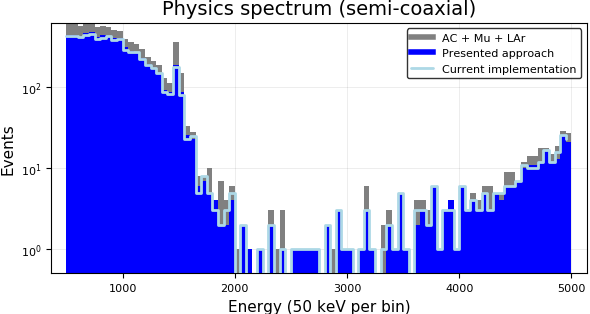

In [39]:
using Plots, StatsBase, LaTeXStrings

bins = linspace(500, 5000, 91)
x_axis = bins[1:end-1]

hist_before = fit(Histogram, data[:E], bins, closed=:left)
hist_after_90 = fit(Histogram, after_cut_90[:E], bins, closed=:left)
hist_ANN = fit(Histogram, data[:ANN_mse_class=>0][:E], bins, closed=:left)

hist_all = plot(size=(15 * 39.37, 8 * 39.37))
plot!(hist_before, line=0, fill=(:grey), label="AC + Mu + LAr")
plot!(hist_after_90, line=0, fill=(:blue), label="Presented approach")
plot!(x_axis, hist_ANN.weights, line=(2, :steppost, :lightblue), label="Current implementation")
yaxis!("Events", :log10, (0.5, maximum(hist_before.weights)))
xaxis!("Energy ($(Int64(round(bins[2]-bins[1]))) keV per bin)")
title!("Physics spectrum (semi-coaxial)")
savefig(resolvepath(env, "plots", "Phy-spectrum-coax.pdf"))
savefig(resolvepath(env, "plots", "Phy-spectrum-coax.png"))
hist_all


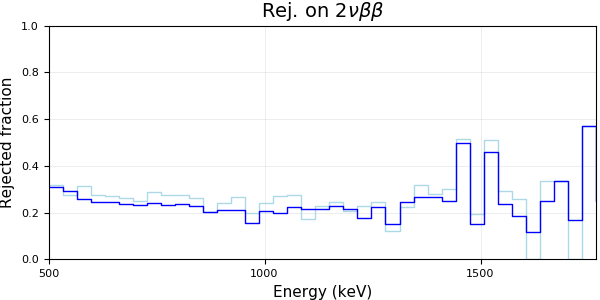

In [48]:
bins = linspace(500, 1800, 41)
x_axis = bins[1:end-1]

hist_before = fit(Histogram, data[:E], bins, closed=:left)
hist_after_90 = fit(Histogram, after_cut_90[:E], bins, closed=:left)
hist_ANN = fit(Histogram, data[:ANN_mse_class=>0][:E], bins, closed=:left)

hist_surv_90 = 1 - hist_after_90.weights ./ hist_before.weights
hist_surv_ANN = 1 - hist_ANN.weights ./ hist_before.weights

fig_fraction = plot(size=(600, 300))
plot!(x_axis, hist_surv_ANN, line=(:steppost, :lightblue), label="Current implementation")
plot!(x_axis, hist_surv_90, line=(:steppost, :blue), label="Presented approach")
xaxis!("Energy (keV)")
yaxis!("Rejected fraction", (0,1))
title!(L"Rej. on $2\nu\beta\beta$", legend=:none)
savefig(resolvepath(env, "plots", "Rejection-2vbb-spectrum-coax.pdf"))
savefig(resolvepath(env, "plots", "Rejection-2vbb-spectrum-coax.png"))
fig_fraction


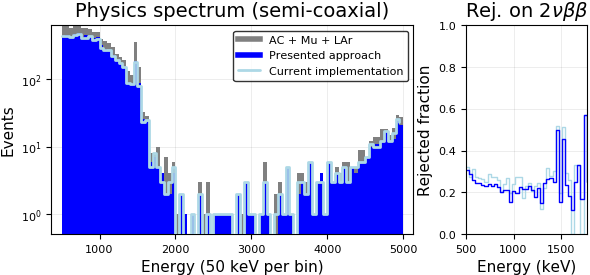

In [49]:
fig = plot(hist_all, fig_fraction, layout=@layout([a b{0.25w}]), size=(15 * 39.37, 7 * 39.37))
savefig("plots/Physics Spectrum coax.pdf")
fig

# Calculate efficiencies

In [5]:
N_2vbb = eventcount(filter(data, :E, E -> (E>=1000)&&(E<=1300)))
N_PNN = eventcount(filter(after_cut_90, :E, E -> (E>=1000)&&(E<=1300)))
N_AoE = eventcount(filter(data[:ANN_mse_class=>0], :E, E -> (E>=1000)&&(E<=1300)))
println("PNN: $(100*N_PNN/N_2vbb) ($N_PNN)")
println("ANN: $(100*N_AoE/N_2vbb) ($N_AoE)")

PNN: 79.36250675310643 (1469)
ANN: 76.87736358725013 (1423)
